# Cargar librerías y lectura de la BD

In [2]:
#Cargar el Dataset desde Kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download tunguz/big-five-personality-test
!unzip big-five-personality-test.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 157M/159M [00:01<00:00, 139MB/s]
100% 159M/159M [00:01<00:00, 150MB/s]
Archive:  big-five-personality-test.zip
  inflating: IPIP-FFM-data-8Nov2018/.directory  
  inflating: IPIP-FFM-data-8Nov2018/codebook.txt  
  inflating: IPIP-FFM-data-8Nov2018/data-final.csv  


In [3]:
#Se cargan las librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

In [4]:
#Se carga el archivo.csv que contiene los datos, previamente añadido a la sesión como "data-final.csv"

datos = pd.read_csv("/content/IPIP-FFM-data-8Nov2018/data-final.csv", sep="\t")
big_five_data = pd.DataFrame(datos)

In [5]:
#Mostrando el DataFrame original
big_five_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


# Limpieza de datos

**`SE INICIA EL PROCESO DE LIMPIEZA DE DATOS`**

In [6]:
#Eliminación de las columnas correspondientes a 'dateload','lat_appx_lots_of_err','long_appx_lots_of_err'
big_five_data = big_five_data.drop(['dateload'], axis=1)
big_five_data = big_five_data.drop(['lat_appx_lots_of_err'], axis=1)
big_five_data = big_five_data.drop(['long_appx_lots_of_err'], axis=1)

In [7]:
# Eliminación de outliers
start_rows = len(big_five_data)
big_five_data = big_five_data.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)
remove_rows = start_rows - len(big_five_data)

print(f'Eliminamos {remove_rows} tuplas que tenían datos incompletos.')
print(f'Esto equivale al {round(remove_rows/start_rows * 100,2)}% de los datos totales.')

Eliminamos 149057 tuplas que tenían datos incompletos.
Esto equivale al 14.68% de los datos totales.


# Rellenado de datos faltantes y categorización

In [8]:
#---> Reemplazamos los valores de 'NONE' por 'NaN
big_five_data['screenw'] = big_five_data['screenw'].replace('NONE',np.nan)
big_five_data['screenh'] = big_five_data['screenh'].replace('NONE',np.nan)
big_five_data['introelapse'] = big_five_data['introelapse'].replace('NONE',np.nan)
big_five_data['testelapse'] = big_five_data['testelapse'].replace('NONE',np.nan)
big_five_data['endelapse'] = big_five_data['endelapse'].replace('NONE',np.nan)
big_five_data['IPC'] = big_five_data['IPC'].replace('NONE',np.nan)
big_five_data['country'] = big_five_data['country'].replace('NONE','NaN')

In [9]:
#Obtenemos los valores del DataFrame para poder procesarlos con las funciones de rellenado
X_1 = big_five_data.iloc[:,:].values

In [10]:
#Categorizamos los datos de la columna 'country' y los asignamos a 'Y'
labelencoder_X = LabelEncoder()
X_1[:,106] = labelencoder_X.fit_transform(X_1[:,106])
Y_1 = pd.DataFrame(X_1)

In [11]:
#Rellenado de datos ---> Utilizamos el método de rellenado basado en la mediana

imp1 = SimpleImputer (missing_values = np.nan, strategy= 'median')  #Basados en el calculo de la mediana se rellenan los NaN
imp1.fit(Y_1)
Datos_Rellenados = imp1.transform(Y_1)

In [12]:
#Mostramos que datos fueron insertados
Datos_Rellenados

array([[  4.,   1.,   5., ...,   6.,   1.,  69.],
       [  3.,   5.,   3., ...,  11.,   1., 144.],
       [  2.,   3.,   4., ...,   7.,   1.,  69.],
       ...,
       [  4.,   2.,   4., ...,  12.,   6., 208.],
       [  2.,   4.,   3., ...,   8.,   1., 208.],
       [  4.,   2.,   4., ...,   9.,   1., 208.]])

In [13]:
#tamaño del DataFrame procesado
Y_1.shape

(866284, 107)

# Graphics ( Sin terminar )


IndexError: ignored

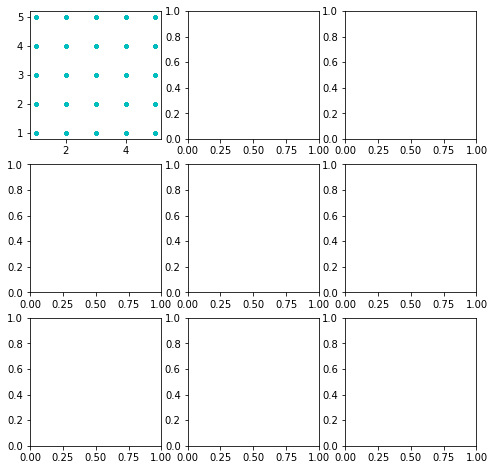

In [ ]:
#potencias = [8, 16, 32, 64, 128,256]
mantener_valor_aleatorio = check_random_state(1000)

fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))

xpts = Datos_Rellenados[:,0]
ypts = Datos_Rellenados[:,1]
n_bacht = 32
colors = ['b', 'orange', 'g', 'indigo', 'c']

for ncenters, ax in enumerate(axes1.reshape(-1), 8):
      n_bacht = n_bacht*2;
      Modelo_Kmeans = MiniBatchKMeans(n_clusters=5,random_state=mantener_valor_aleatorio,batch_size=n_bacht, max_iter=1000)
      Modelo_Kmeans.fit_predict(Y_1) 
      Etiquetas = Modelo_Kmeans.labels_
      centros = Modelo_Kmeans.cluster_centers_ 
        
      for j in range(ncenters):
         ax.plot(xpts[Etiquetas == j],
                ypts[Etiquetas == j], '.', color=colors[j])

      for pt in centros:
          ax.plot(pt[0], pt[1], 'rs')
    
      ax.set_title('N Bacht = {0}'.format(n_bacht))
      ax.axis('off') 
    

fig1.tight_layout()
plt.show()

# Clustering usando MiniBatch.Kmeans

In [14]:
#Obtenemos los valos del DF y creamos una copía para trabajar con los 2 modelos posteriores
X_1 = Y_1.iloc[:,:].values
Y_2 = Y_1

In [15]:
Y_2

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3116.0,2992.0,4354.0,768.0,1024.0,9.0,234.0,6,1,69
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,3374.0,3096.0,3019.0,1360.0,768.0,12.0,179.0,11,1,144
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,6295.0,1585.0,2529.0,1366.0,768.0,3.0,186.0,7,1,69
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4192.0,3480.0,3257.0,1920.0,1200.0,186.0,219.0,7,1,69
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5320.0,11401.0,8642.0,1366.0,768.0,8.0,315.0,17,2,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866279,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2025.0,1873.0,1232.0,1920.0,1080.0,3.0,160.0,10,2,208
866280,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1144.0,2936.0,1615.0,1920.0,1080.0,3.0,122.0,7,1,208
866281,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2648.0,2646.0,1287.0,1920.0,1080.0,2.0,135.0,12,6,208
866282,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2799.0,7184.0,2526.0,1920.0,1080.0,6.0,212.0,8,1,208


Modelo con batch_size = **32**

In [16]:
Modelo_Kmeans_32 = MiniBatchKMeans(n_clusters=5,random_state=0,batch_size=32, max_iter=1000)
Modelo_Kmeans_32 = Modelo_Kmeans_32.partial_fit(X_1[0:435000,:])
Modelo_Kmeans_32 = Modelo_Kmeans_32.partial_fit(X_1[435000:866284,:])
centros = Modelo_Kmeans_32.cluster_centers_ 
personalityes2 = Modelo_Kmeans_32.fit_predict(X_1)
Y_1['Personalidad'] = personalityes2

#Modelo creado, y clustering asignado a la copia Y_1
Modelo_Kmeans_32

MiniBatchKMeans(batch_size=32, max_iter=1000, n_clusters=5, random_state=0)

Modelo con batch_size = **64**

In [17]:
#Modelo con batch_size = 64
Modelo_Kmeans_64 = MiniBatchKMeans(n_clusters=5,random_state=1,batch_size=64, max_iter=1000)
Modelo_Kmeans_64 = Modelo_Kmeans_64.partial_fit(X_1[0:435000,:])
Modelo_Kmeans_64 = Modelo_Kmeans_64.partial_fit(X_1[435000:866284,:])
centros = Modelo_Kmeans_64.cluster_centers_ 
personalityes = Modelo_Kmeans_64.fit_predict(X_1)
Y_2['Personalidad'] = personalityes

#Modelo creado, y clustering asignado a la copia Y_2
Modelo_Kmeans_64

MiniBatchKMeans(batch_size=64, max_iter=1000, n_clusters=5, random_state=1)

# Creación de la red neuronal con Y_2

---




**RN CON EL CLUSTERING ASIGNADO A Y_2**

In [18]:
#Definición de variable dependiente e independiente
#Division de los datos

Y = Y_2['Personalidad']
X = Y_2.drop(Y_2.columns[8], axis=1)
X = X.astype(np.float64)
X_train,X_set,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

#Creación del modelo-RN
MLP_2 = MLPClassifier(activation = "logistic",alpha=1e-4,batch_size = 64, hidden_layer_sizes=(50,50,50),
                      max_iter=1000,tol=1e-4,random_state=1,solver='sgd',verbose=10)
                    #(batch_size = 64,hidden_layer_sizes=(50,50,50),solver='sgd', verbose=10,random_state=1, max_iter=1000,activation = "logistic")

In [19]:
#Se entrena la RN
MLP_2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Iteration 1, loss = 0.14316356
Iteration 2, loss = 0.13442065
Iteration 3, loss = 0.12083957
Iteration 4, loss = 0.10457175
Iteration 5, loss = 0.09757936
Iteration 6, loss = 0.09254164
Iteration 7, loss = 0.09680074
Iteration 8, loss = 0.09072188
Iteration 9, loss = 0.09355532
Iteration 10, loss = 0.08921659
Iteration 11, loss = 0.09713032
Iteration 12, loss = 0.10383250
Iteration 13, loss = 0.09072009
Iteration 14, loss = 0.08819589
Iteration 15, loss = 0.08992599
Iteration 16, loss = 0.09326473
Iteration 17, loss = 0.09297861
Iteration 18, loss = 0.09233691
Iteration 19, loss = 0.09181747
Iteration 20, loss = 0.09161751
Iteration 21, loss = 0.09140730
Iteration 22, loss = 0.09056003
Iteration 23, loss = 0.09189046
Iteration 24, loss = 0.10393860
Iteration 25, loss = 0.09890690
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', batch_size=64,
              hidden_layer_sizes=(50, 50, 50), max_iter=1000, random_state=1,
              solver='sgd', verbose=10)

In [20]:
#Se calcula la probabilidad predicha de la muestra para cada clase en el modelo
MLP_2.predict_proba(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[2.24637998e-03, 4.37535331e-04, 1.30210442e-03, 9.91282582e-01,
        4.73139853e-03],
       [2.24637998e-03, 4.37535331e-04, 1.30210442e-03, 9.91282582e-01,
        4.73139853e-03],
       [2.24637998e-03, 4.37535331e-04, 1.30210442e-03, 9.91282582e-01,
        4.73139853e-03],
       ...,
       [2.24637998e-03, 4.37535331e-04, 1.30210442e-03, 9.91282582e-01,
        4.73139853e-03],
       [2.24637998e-03, 4.37535331e-04, 1.30210442e-03, 9.91282582e-01,
        4.73139853e-03],
       [2.24637998e-03, 4.37535331e-04, 1.30210442e-03, 9.91282582e-01,
        4.73139853e-03]])

In [21]:
#Se pone a prueba la RN con los datos de prueba, se realiza predicción
y_pred = MLP_2.predict(X_set)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [22]:
#Metrica de Score
#Evaluamos el entrenamiento
print("Puntuación del conjunto de entrenamiento: %f" % (MLP_2.score(X_train, y_train)*100),"%")

#Evaluamos la predicción
print("Puntuación del conjunto de prueba: %f" % (MLP_2.score(X_set, y_test)*100),"%")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Puntuación del conjunto de entrenamiento: 98.118397 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Puntuación del conjunto de prueba: 98.104554 %


In [23]:
#Comparación entre los datos actuales y las predicciones
asc = accuracy_score(y_test, y_pred)
print("Coincidencia entre datos actuales y la predicción es de ",(asc*100),"%")

Coincidencia entre datos actuales y la predicción es de  98.1045535350115 %


In [24]:
#Obtener reporte en general del modelo
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       920
           1       0.00      0.00      0.00       237
           2       0.58      0.81      0.68      2064
           3       0.99      1.00      0.99    253502
           4       0.53      0.08      0.14      3163

    accuracy                           0.98    259886
   macro avg       0.42      0.38      0.36    259886
weighted avg       0.97      0.98      0.97    259886



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#Se extraen los ecoeficientes (Un par para cada dato de entrada)
#coefs_ es una lista de matrices de peso, donde la matriz de peso en el índice i representa los pesos 
#entre la capa i y la capa i + 1.
coef = MLP_2.coefs_
print(len(coef))

#Se extraen los interceptos (Capas ocultas y salidas)
#intercepts_ es una lista de vectores de sesgo, donde el vector en el índice i representa 
#los valores de sesgo agregados a la capa i + 1.
inter = MLP_2.intercepts_

4
